### Problem Statement:
The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the 
#### > 50K group or <= 50K group.

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Understand the unique categories in the dataset

In [73]:
for i in df.columns:
    print(i,":\n",df[i].unique())

age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302]
education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming

In [74]:
df.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [75]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [76]:
df["workclass"].mode()

0     Private
Name: workclass, dtype: object

In [77]:
df["workclass"].replace(' ?', ' Private', inplace = True)

In [78]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [79]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [80]:
df["occupation"].mode()

0     Prof-specialty
Name: occupation, dtype: object

In [81]:
df["occupation"].replace(' ?', ' Prof-specialty', inplace = True)

In [82]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [83]:
df["country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [84]:
df["country"].mode()

0     United-States
Name: country, dtype: object

In [85]:
df["country"].replace(' ?', ' United-States', inplace = True)

In [86]:
df["country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [87]:
df.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [88]:
for i in df.columns:
    print(i,":\n",df[i].unique())

age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302]
education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fish

In [89]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [90]:
income_all = df['salary'].value_counts(normalize = True)
income_all*100

 <=50K    75.919044
 >50K     24.080956
Name: salary, dtype: float64

### Here we can see that 75.9% people have salary below 50k and remaining have salary above 50k,so the data here is skewed


#   Visualization of Data 

# 1. Based on Sex/Gender

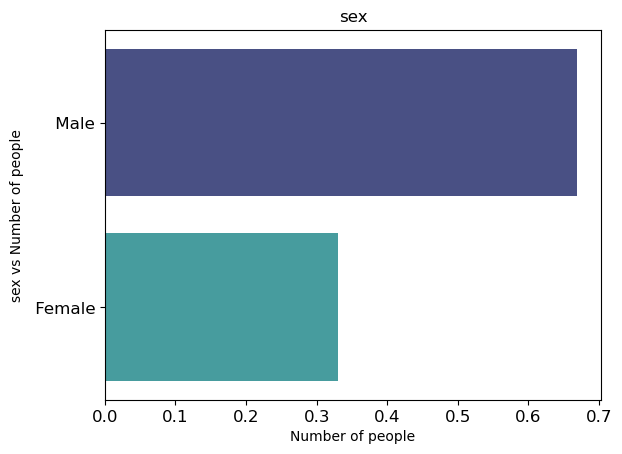

In [91]:
edu = df["sex"].value_counts(normalize=True)

sns.barplot(x = edu.values, y = edu.index, palette='mako')
plt.title('sex')
plt.xlabel('Number of people')
plt.ylabel('sex vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

### From the above plot Majority of them are Male

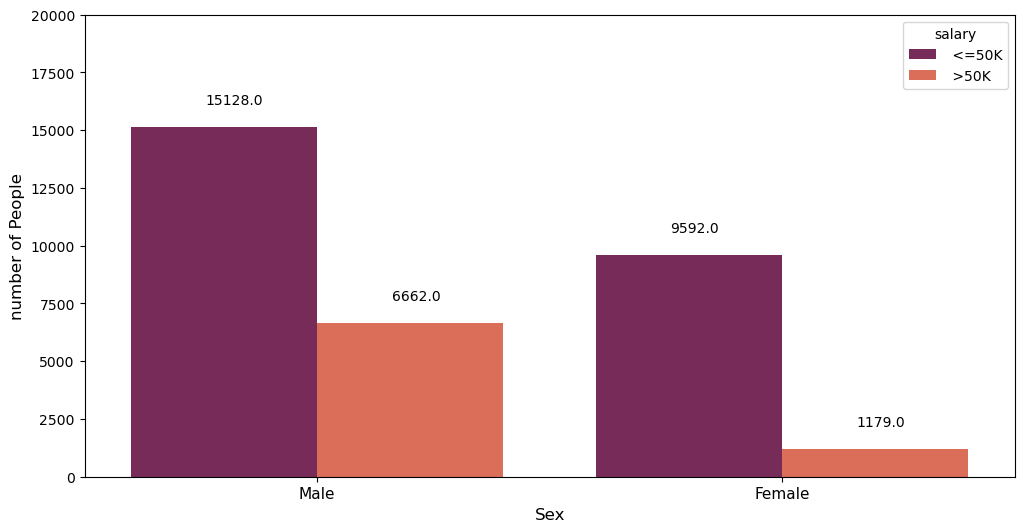

In [92]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df, x = 'sex', hue="salary", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("number of People", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()


### As majority of them are male in the dataset. So, more number of men is getting salary is <= 50k and > 50k

# 2. Based on Education

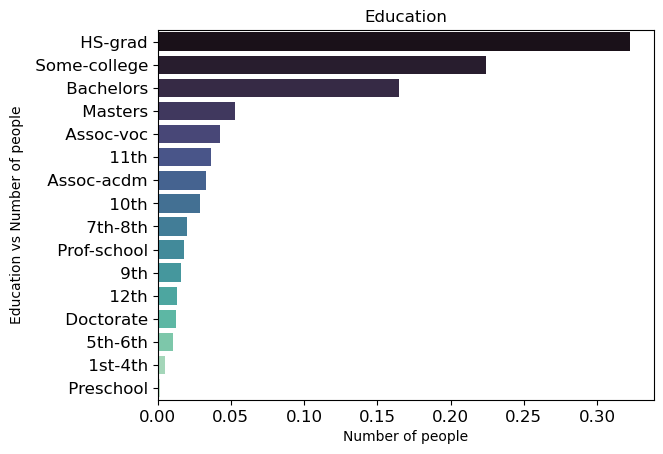

In [93]:
edu = df["education"].value_counts(normalize=True)

sns.barplot(x = edu.values, y = edu.index, palette='mako')
plt.title('Education')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

### From the above plot, we see that the majority of people have completed HS-Grad, Some-College, Bachelors greater than 15 %

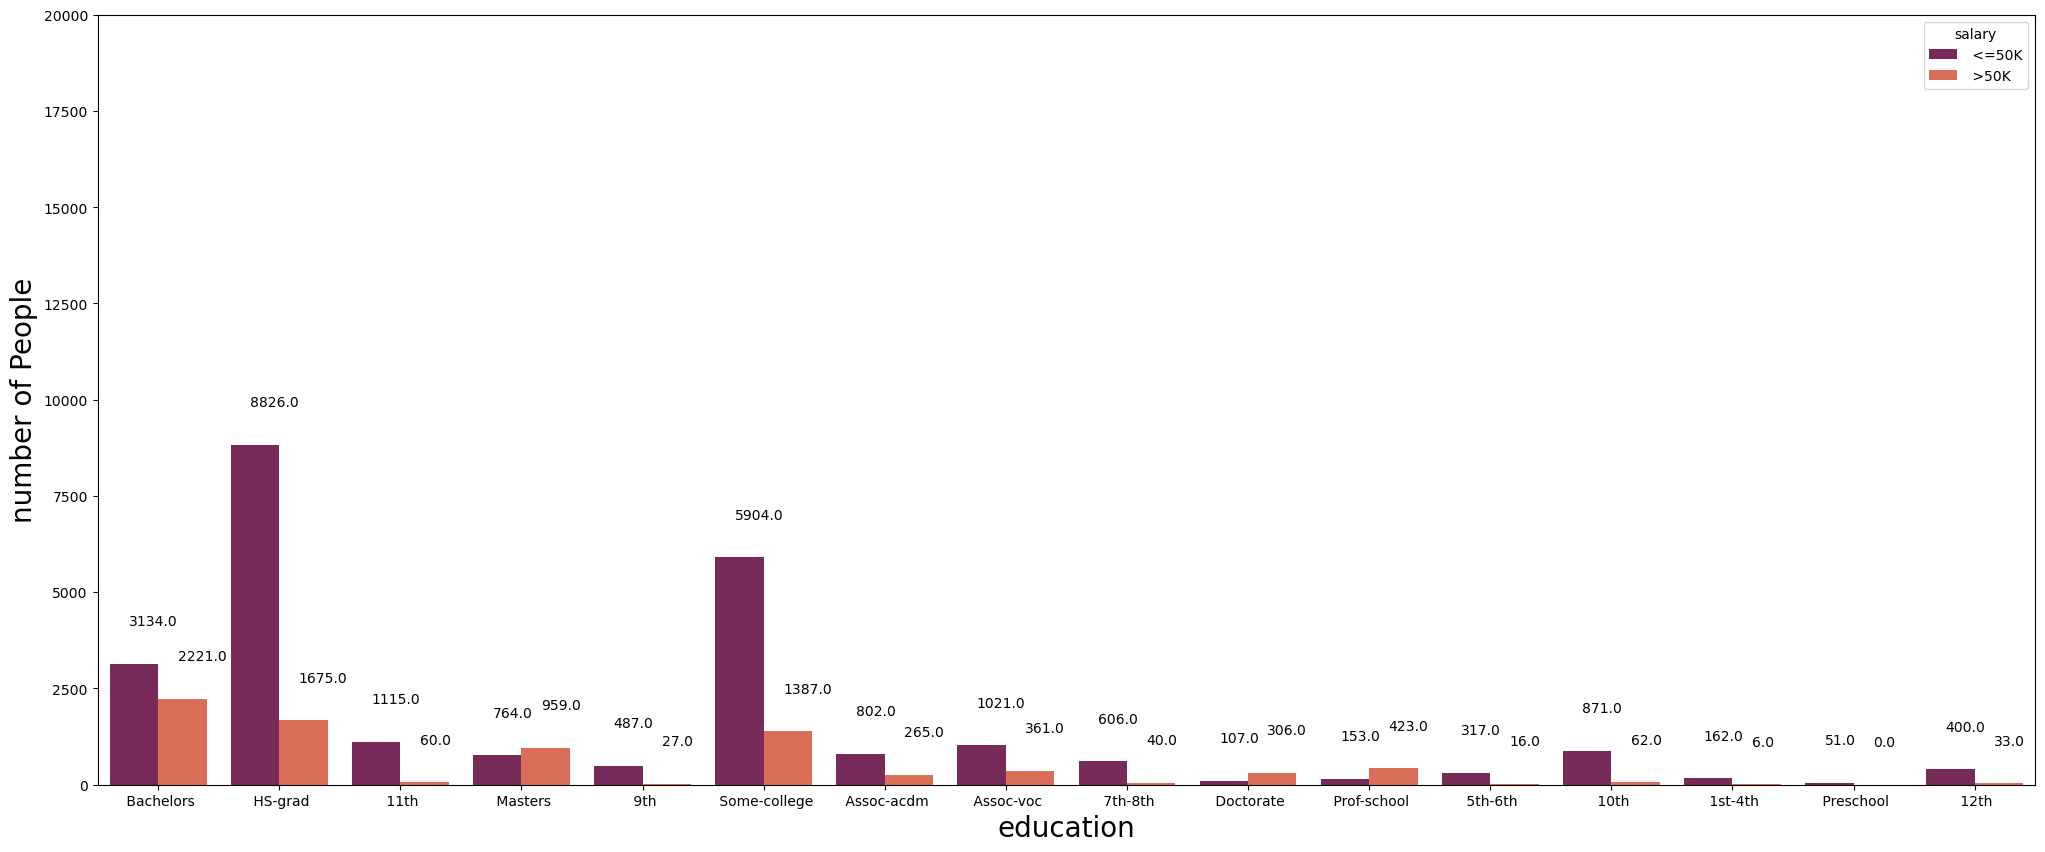

In [94]:
plt.figure(figsize=(25,10))
ax = sns.countplot(data = df, x = 'education', hue="salary", palette = 'rocket')

plt.xlabel("education", fontsize= 20)
plt.ylabel("number of People", fontsize= 20)
plt.ylim(0,20000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()


### From the above plot HS-grad, Bachelors, Some-college are the more number of people is getting salary is <= 50k and > 50k

# 3.Based on Marital Status

In [95]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

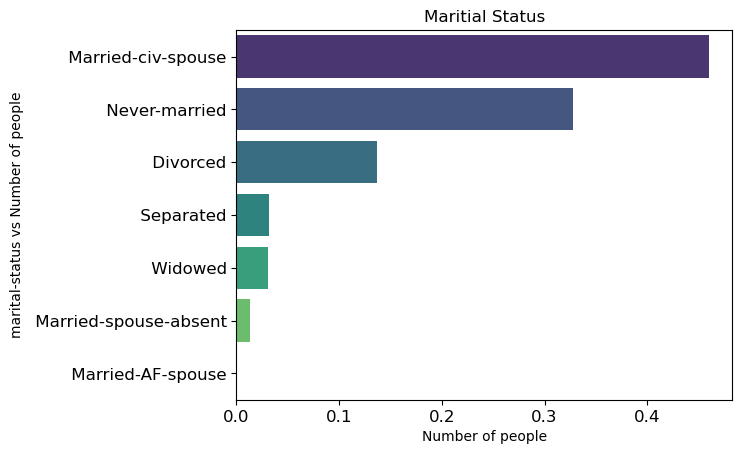

In [96]:
status = df["marital-status"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('Maritial Status')
plt.xlabel('Number of people')
plt.ylabel('marital-status vs Number of people')
plt.tick_params(labelsize=12)
plt.show()


### From the above plot, we see that the majority of people having Marital Status of             Married-civ-spouse, Never-married are greater than 30%.

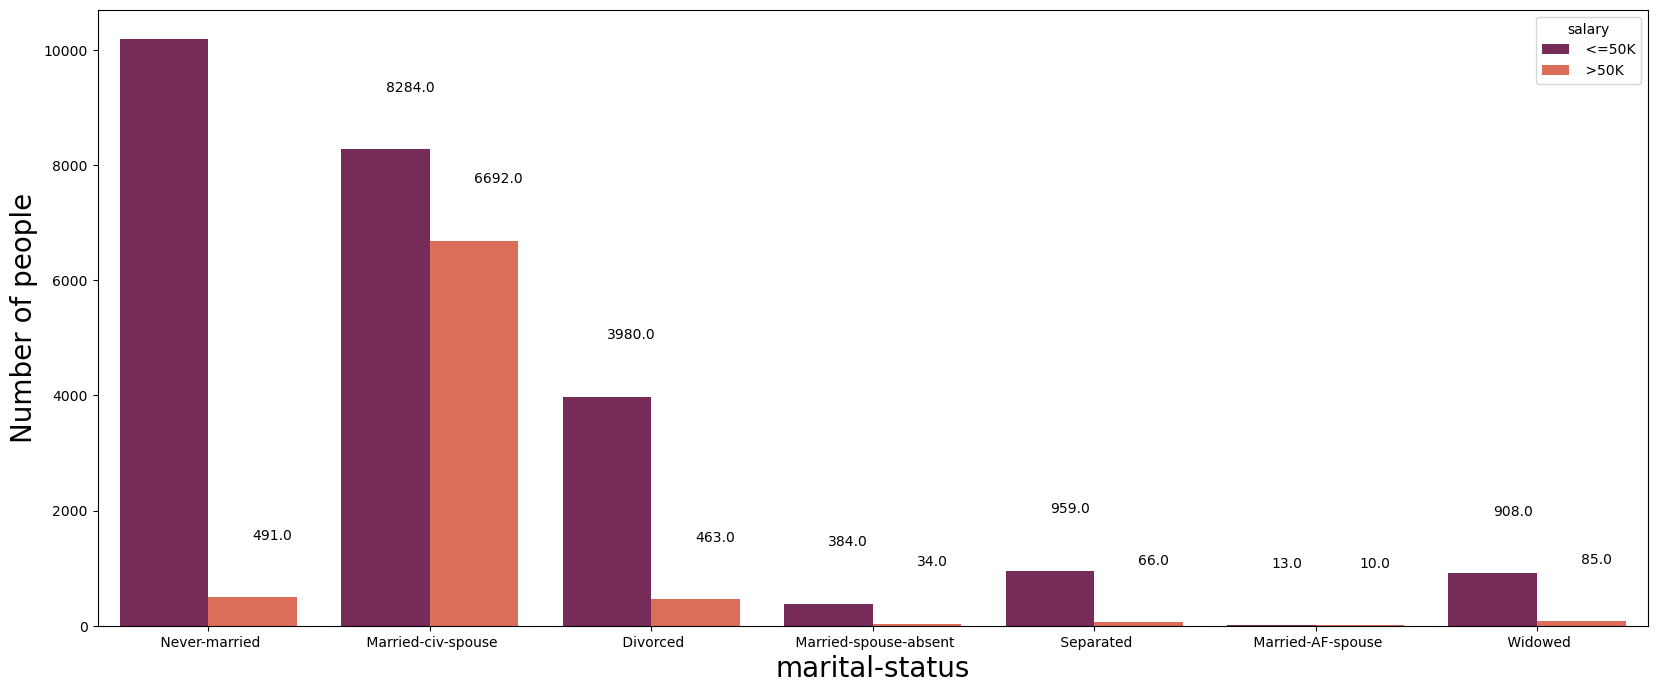

In [97]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'marital-status', hue="salary", palette = 'rocket')

plt.xlabel("marital-status", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

### From the above plot, 
### a) more number of Never-married people is getting salary is <= 50k.
### b) more number of Married-civ-spouse people is getting salary is <= 50k and >50k.

# 4. Based on Age

C:\Users\breva\AppData\Local\Temp\ipykernel_20840\2397728310.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color='purple')


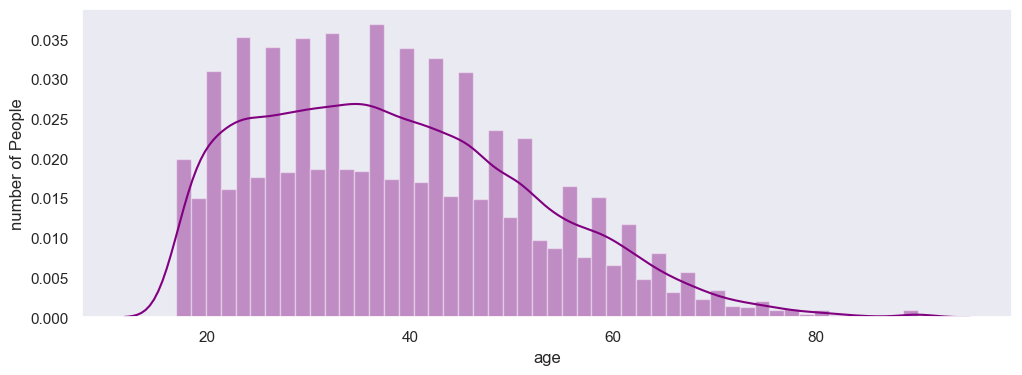

In [98]:
plt.figure(figsize=(12,4))

sns.set(style='dark')
data=df.copy()
sns.distplot(data['age'], color='purple')
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('number of People')
plt.show()

In [99]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

### From the above plot, there are more number of people of having age in the range is around  36 - 40 yrs

# 5. Based on Race

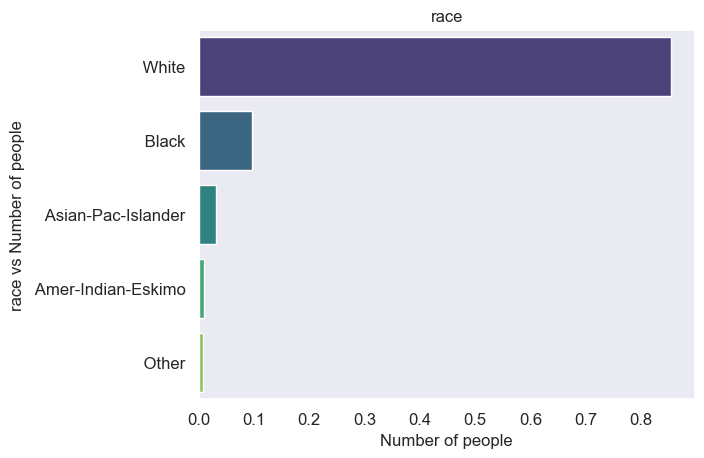

In [100]:
status = df["race"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('race')
plt.xlabel('Number of people')
plt.ylabel('race vs Number of people')
plt.tick_params(labelsize=12)
plt.show()


### From the above plot, we see that the majority of people are White

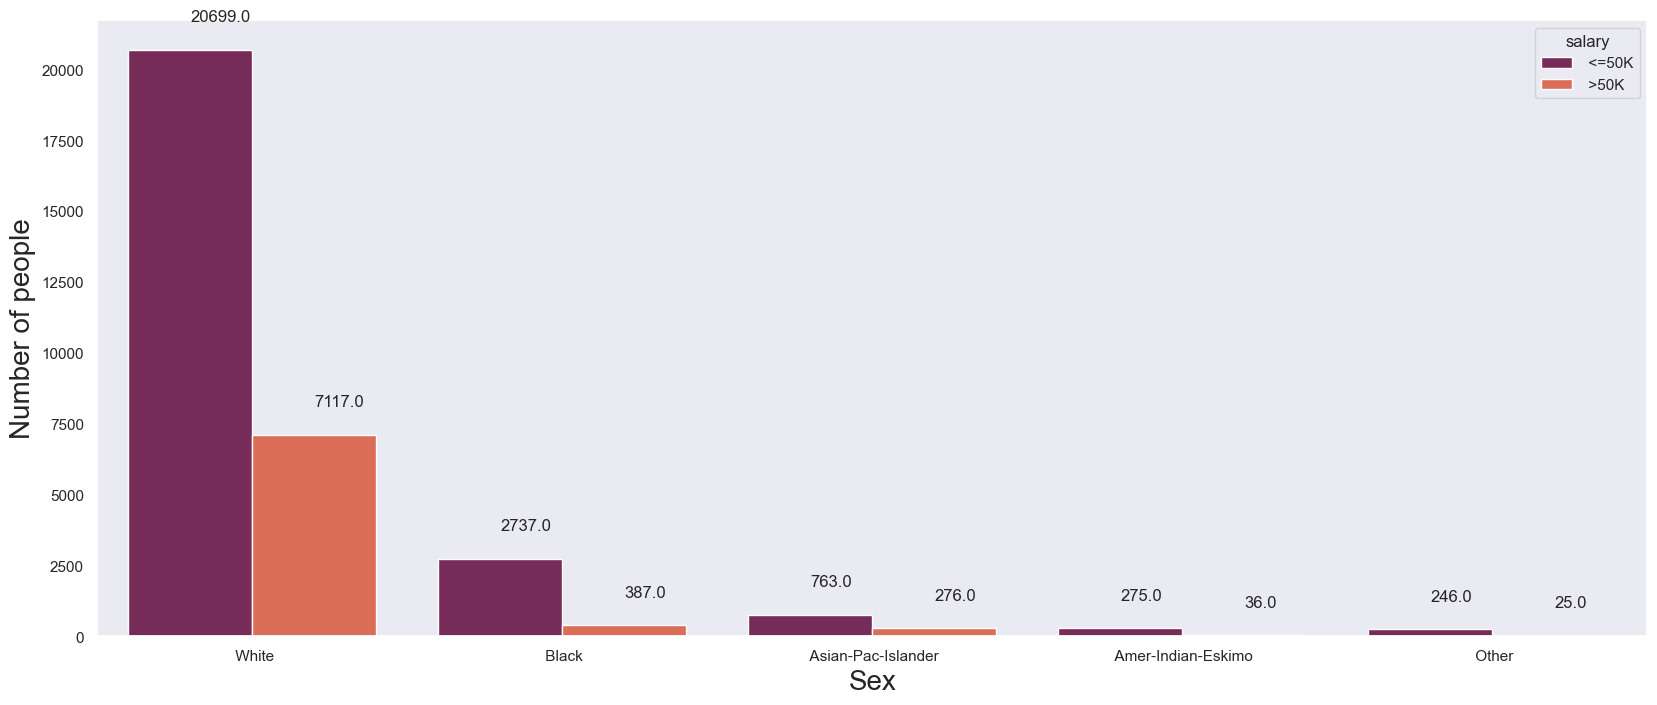

In [101]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'race', hue="salary", palette = 'rocket')

plt.xlabel("Sex", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

### As majority of them are White people in the dataset. So, more number of White people are getting salary is <= 50k and > 50k

# 6. Average Hours per Week

C:\Users\breva\AppData\Local\Temp\ipykernel_20840\3488579751.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hours-per-week'], color='purple')


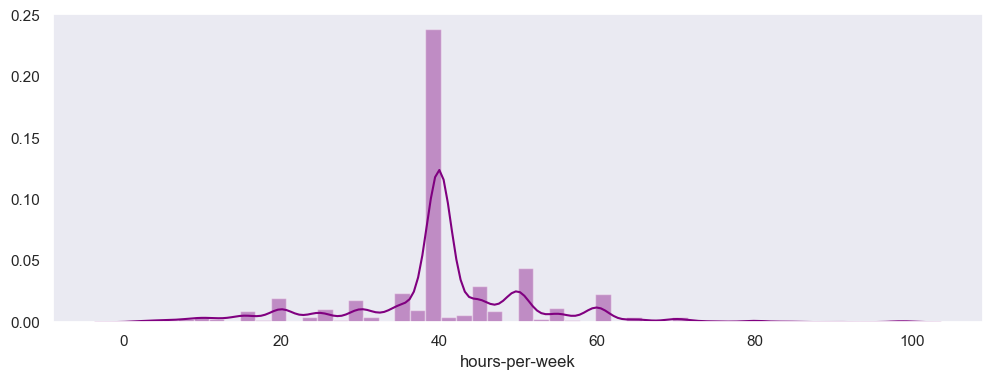

In [102]:

plt.figure(figsize=(12,4))

sns.set(style='dark')
sns.distplot(df['hours-per-week'], color='purple')
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [103]:
df["hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

### From the above plot average Hours per week by an individual is 40

# 7. Occupation

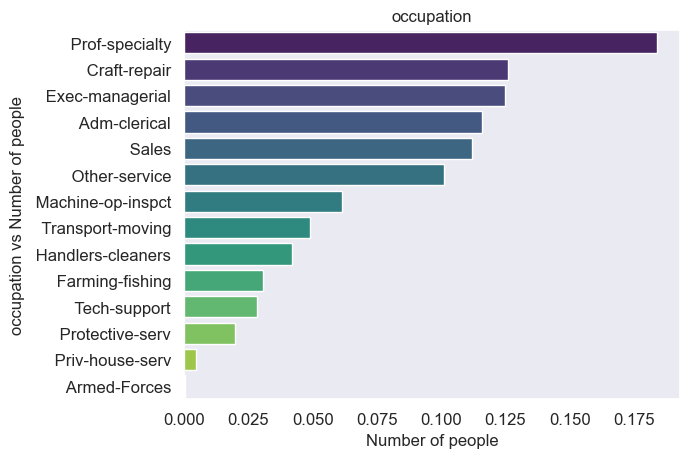

In [104]:
status = df["occupation"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('occupation')
plt.xlabel('Number of people')
plt.ylabel('occupation vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

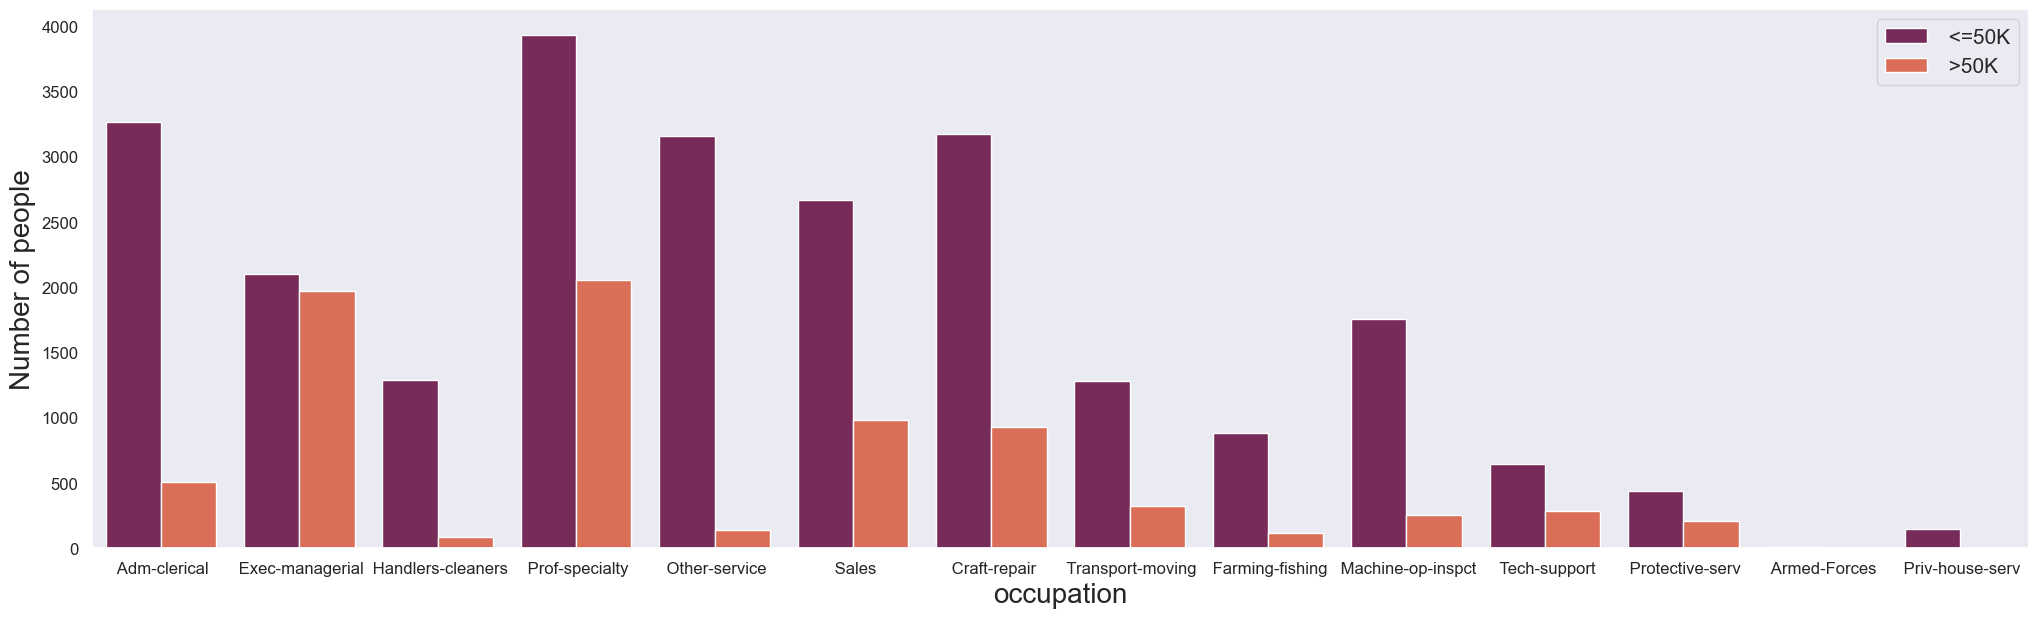

In [105]:
plt.figure(figsize=(25,7))
ax = sns.countplot(data = df, x = 'occupation', hue="salary", palette = 'rocket')

plt.xlabel("occupation", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()



### From the above plot Adm-clerical,Other-service,Craft-repair is getting salary is <= 50k.

### From the above plot Exec-managerial,Prof-speciality,Craft-repair is getting salary is >50k.


# 8. Country

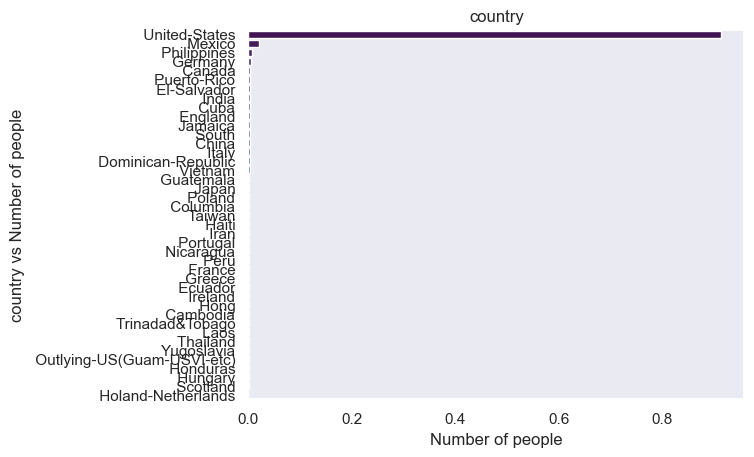

In [106]:
status = df["country"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('country')
plt.xlabel('Number of people')
plt.ylabel('country vs Number of people')
plt.show()

### From the above plot most of the data is from the United States

# 9. Workclass

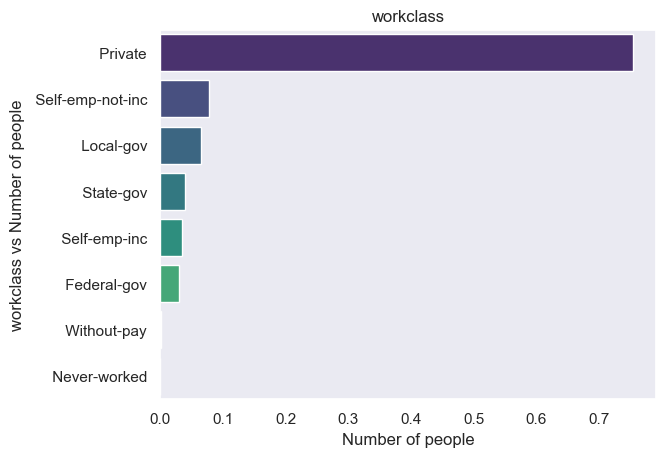

In [107]:
status = df["workclass"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('workclass')
plt.xlabel('Number of people')
plt.ylabel('workclass vs Number of people')
plt.show()

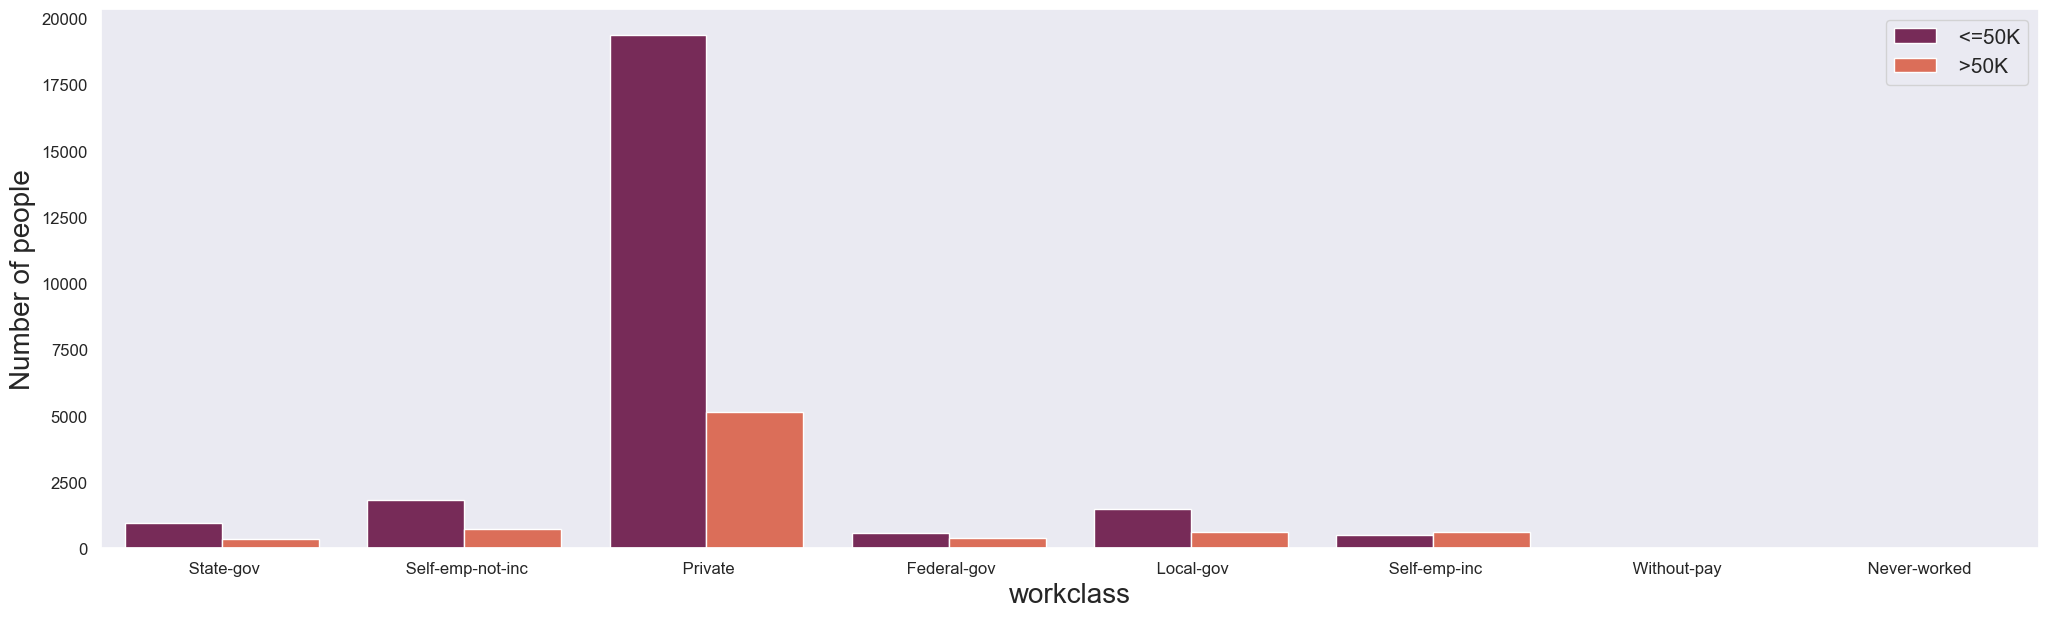

In [108]:
plt.figure(figsize=(25,7))
ax = sns.countplot(data = df, x = 'workclass', hue="salary", palette = 'rocket')

plt.xlabel("workclass", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()



### From the above plot number of people in private are more those who are getting salary which is <= 50k and > 50k

## 10. Relationship

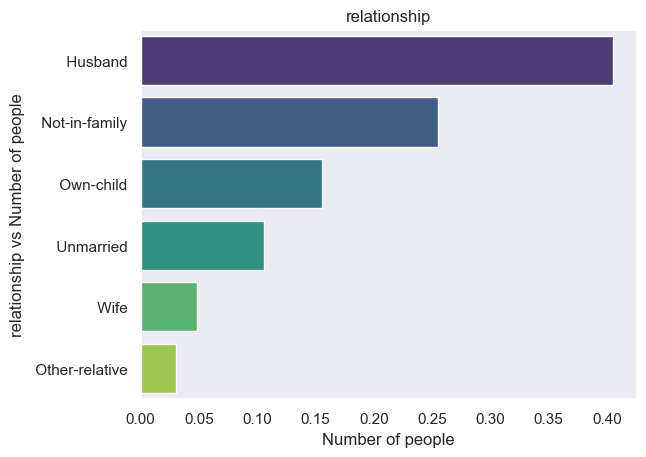

In [109]:
status = df["relationship"].value_counts(normalize=True)

sns.barplot(x = status.values, y = status.index, palette='viridis')
plt.title('relationship')
plt.xlabel('Number of people')
plt.ylabel('relationship vs Number of people')
plt.show()

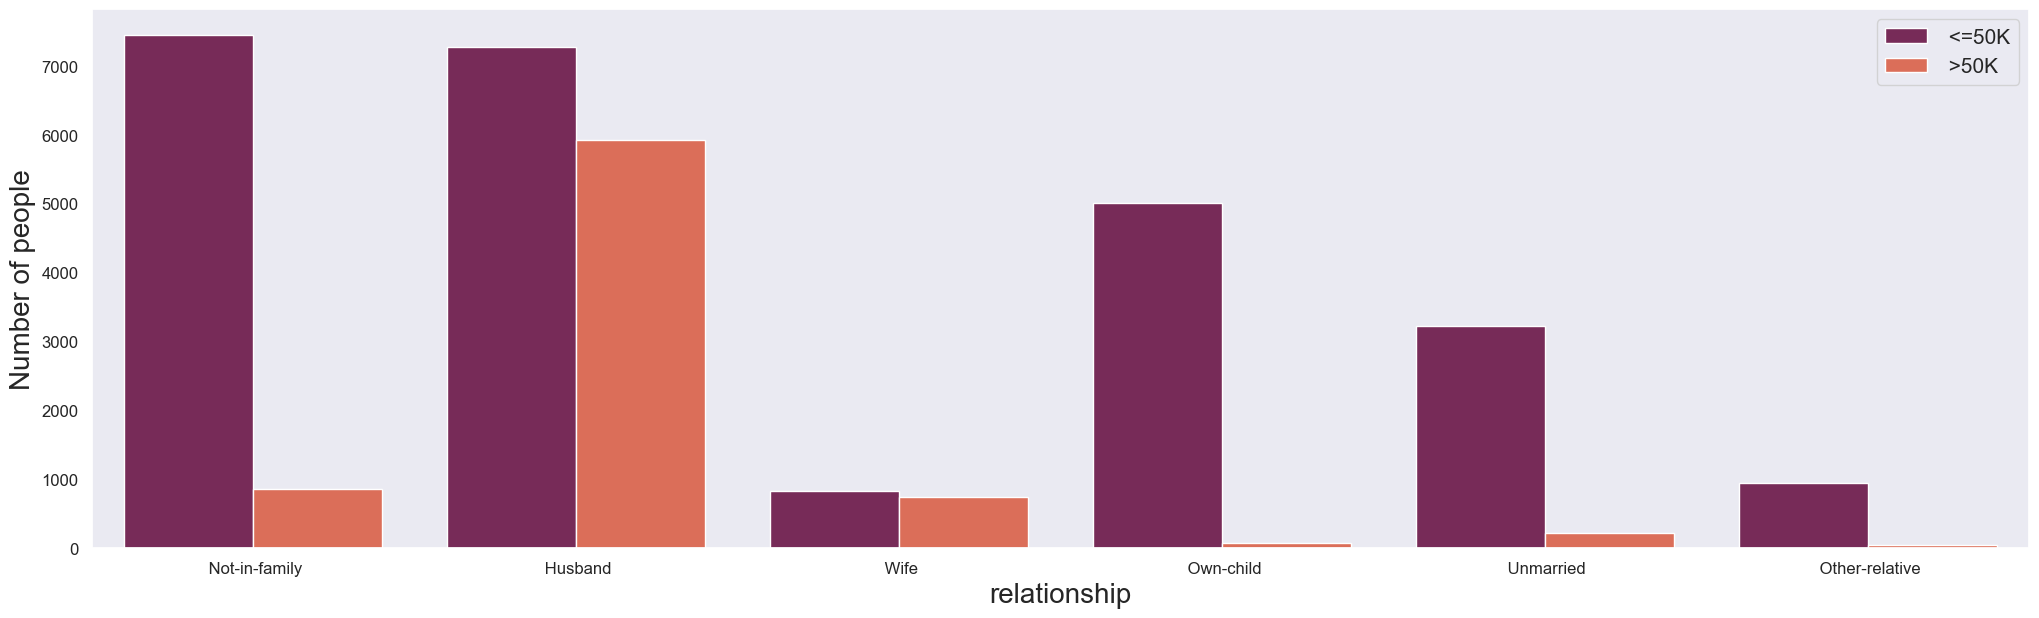

In [110]:
plt.figure(figsize=(25,7))
ax = sns.countplot(data = df, x = 'relationship', hue="salary", palette = 'rocket')

plt.xlabel("relationship", fontsize= 20)
plt.ylabel("Number of people", fontsize= 20)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()



### From the above plot, 
### a) category of Husband is more  who are getting salary which is <= 50k and > 50k
### b) category of Not-in-family is more  who are getting salary which is <= 50k 

## 11.Education number,Race & Salary

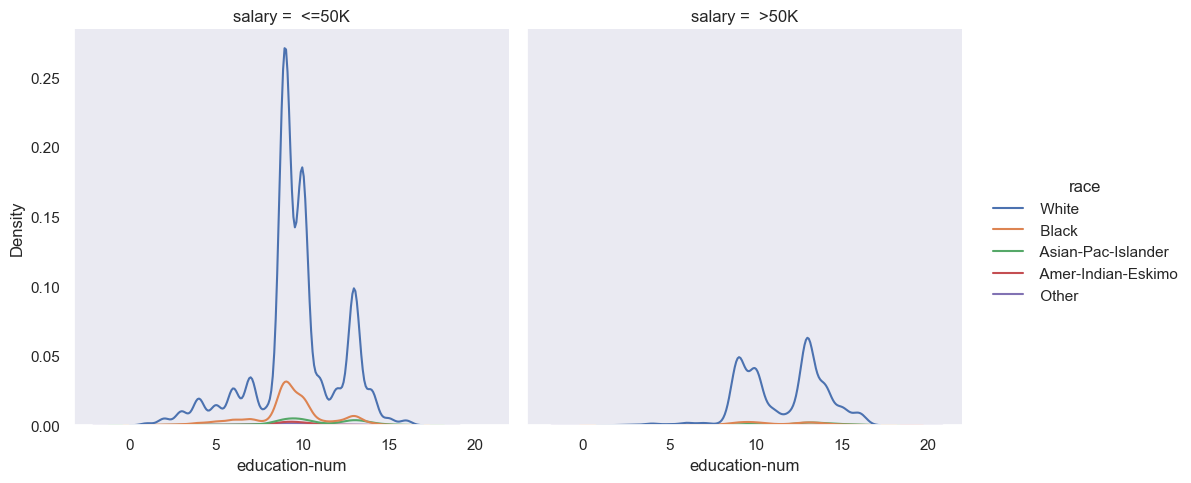

In [111]:
sns.displot(data=df, x=df["education-num"], hue=df["race"], 
            col=df["salary"], kind="kde")


- Most of the people who are white having education for around 9 years and get a salary of <=50 k.
- Very few white people seem to get education for around 13 years and recieve a salary of >50 k.
- All other races do not get that much education and therefore have low salary.


## Hours per week,relationship & Salary

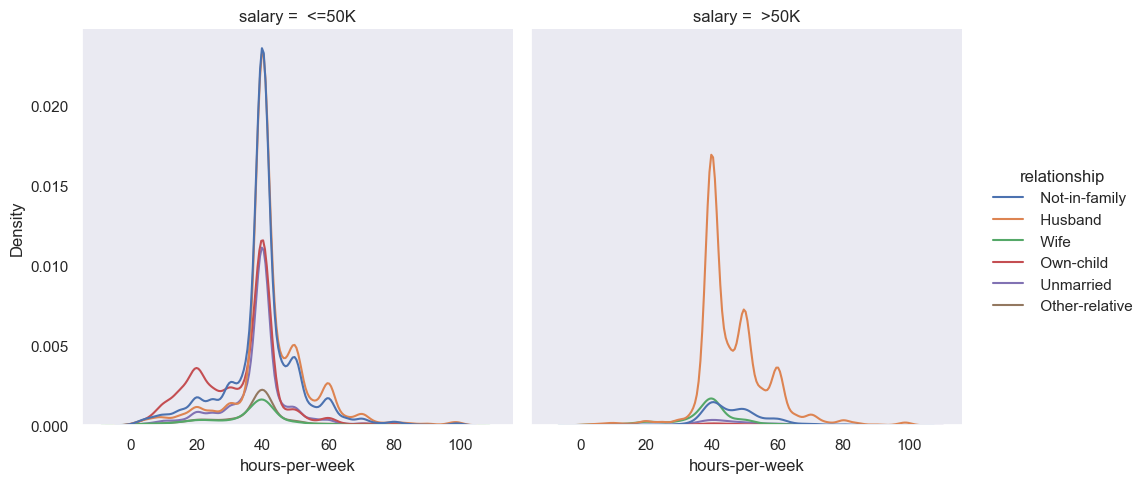

In [112]:
sns.displot(data=df, x=df["hours-per-week"], hue=df["relationship"], 
            col=df["salary"], kind="kde")

- Most of the people who are not in family work for around 40 hours per week and get a salary of <= 50 k.
- People who have a relationship of husband work for around 40 hours per week and recieve a salary of > 50 k.

## Marital-status, Hours per week & Salary

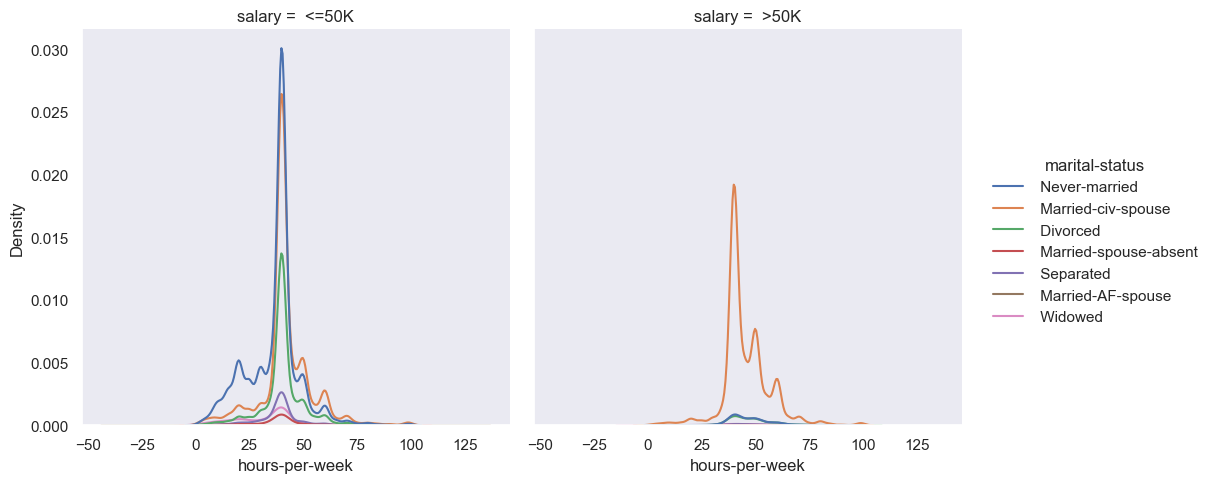

In [113]:
sns.displot(data=df, x=df["hours-per-week"], hue=df["marital-status"], 
            col=df["salary"], kind="kde")

- Most of the people who are in Never-married, Married-civ-spouse,Divorced work for around 40 hours per week and 
  get a salary of <= 50 k.
  
- Most of the people who are Married-civ-spouse work for around 40 hours per week and recieve a salary of > 50 k.

# Plotting graphs for numerical columns.

In [115]:
df1=df[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]]



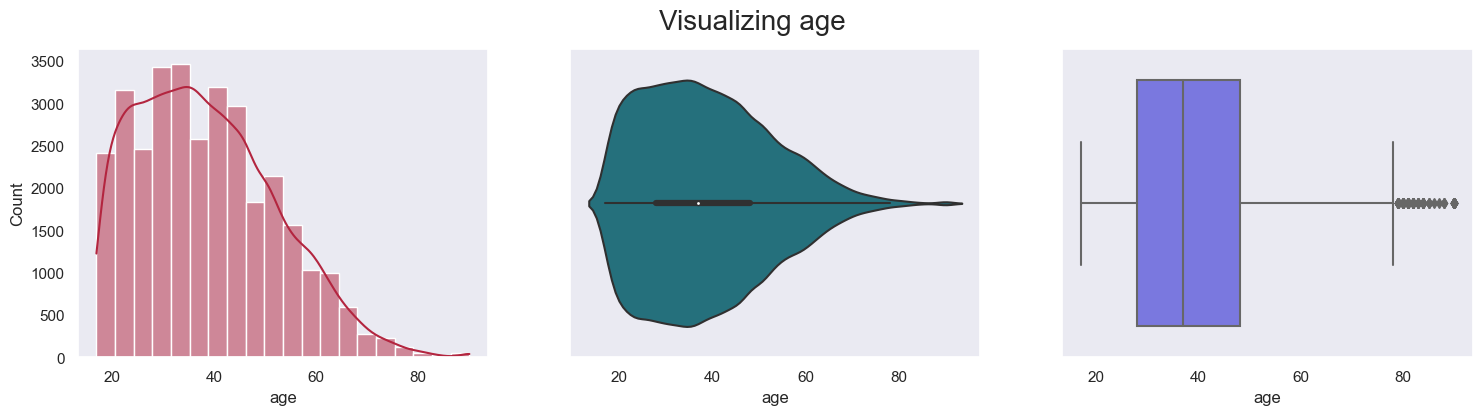

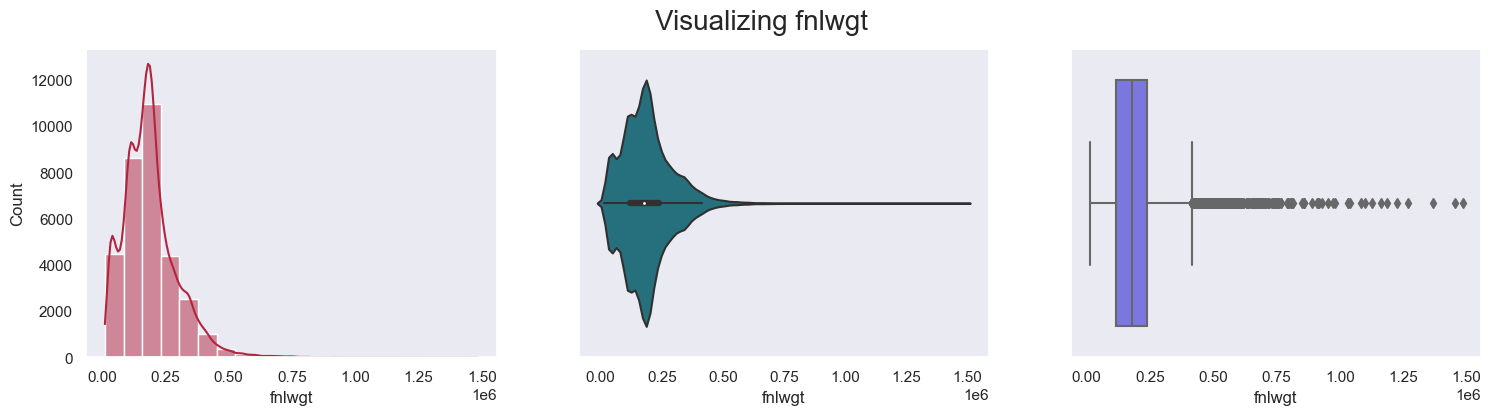

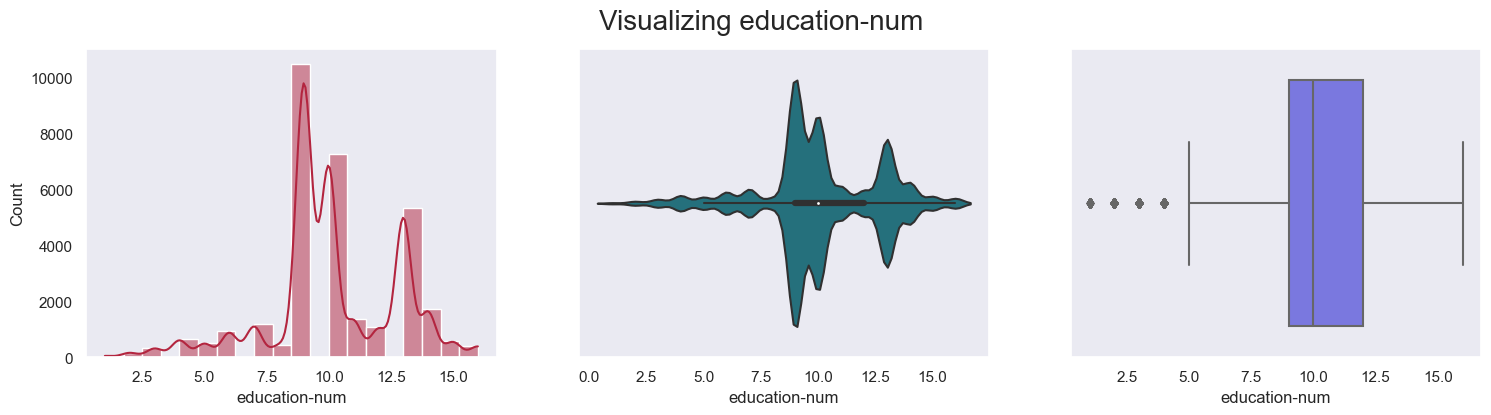

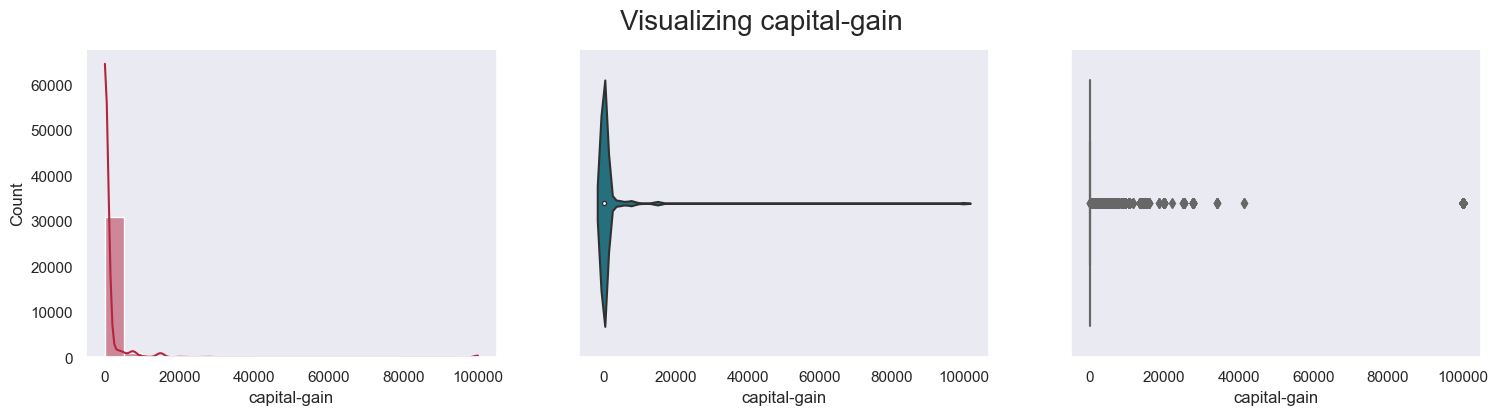

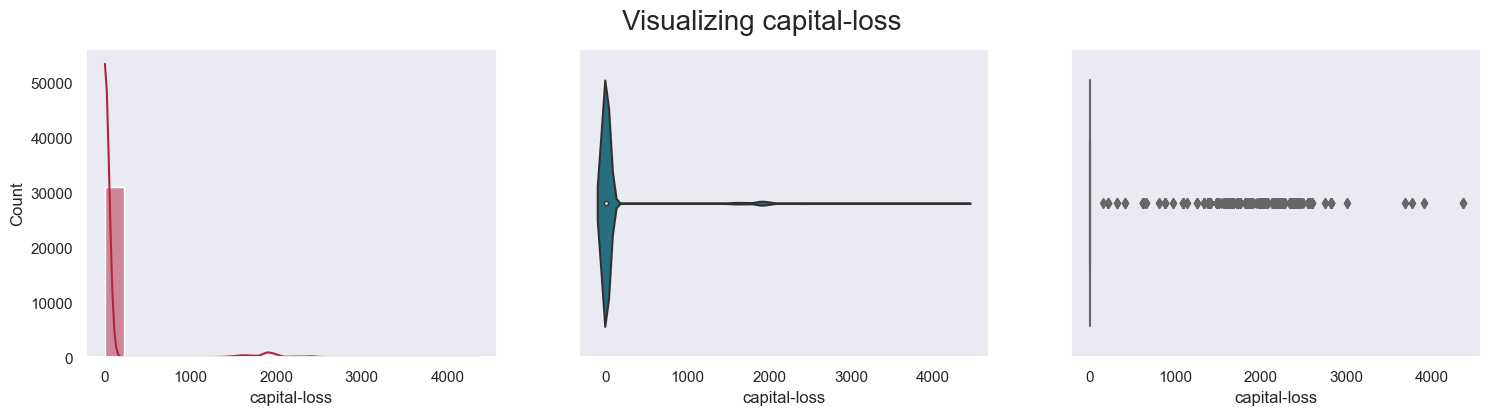

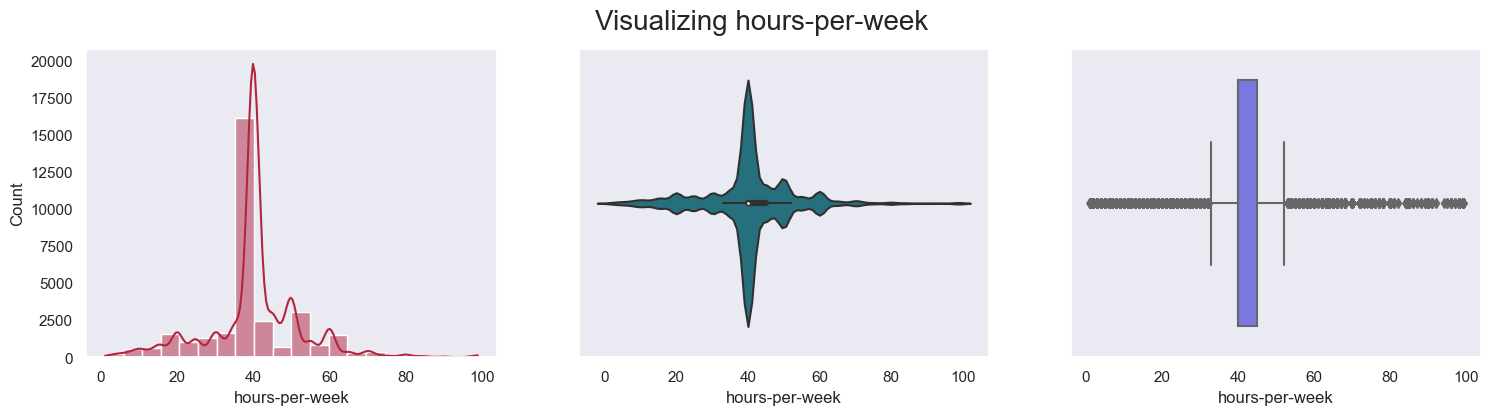

In [116]:
for i in df1.columns:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df1,x=i,kde=True,bins=20,ax=ax[0],color="#b3253f")
    sns.violinplot(data=df1,x=i,ax=ax[1],color="#177a8a")
    sns.boxplot(data=df1,x=i,ax=ax[2],color="#6967f0")
    plt.suptitle(f'Visualizing {i}',size=20)

### Right-Skewed Data:

- Age
- Fnlwgt

### Outliers:
- Age
- Fnlwgt
- Education-num
- Capital-gain
- Capital-loss
- hours-per-week

In [117]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

In [118]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        
        df[col] = le.fit_transform(df[col].astype(str))

In [119]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
country           int32
salary            int32
dtype: object

In [120]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [128]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
education-num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
marital-status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
sex,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


In [ ]:
workclass,fnlwgt,education, occupation, race, country

"fnlwgt","education","marital.status","relationship","native.country"

<Axes: >

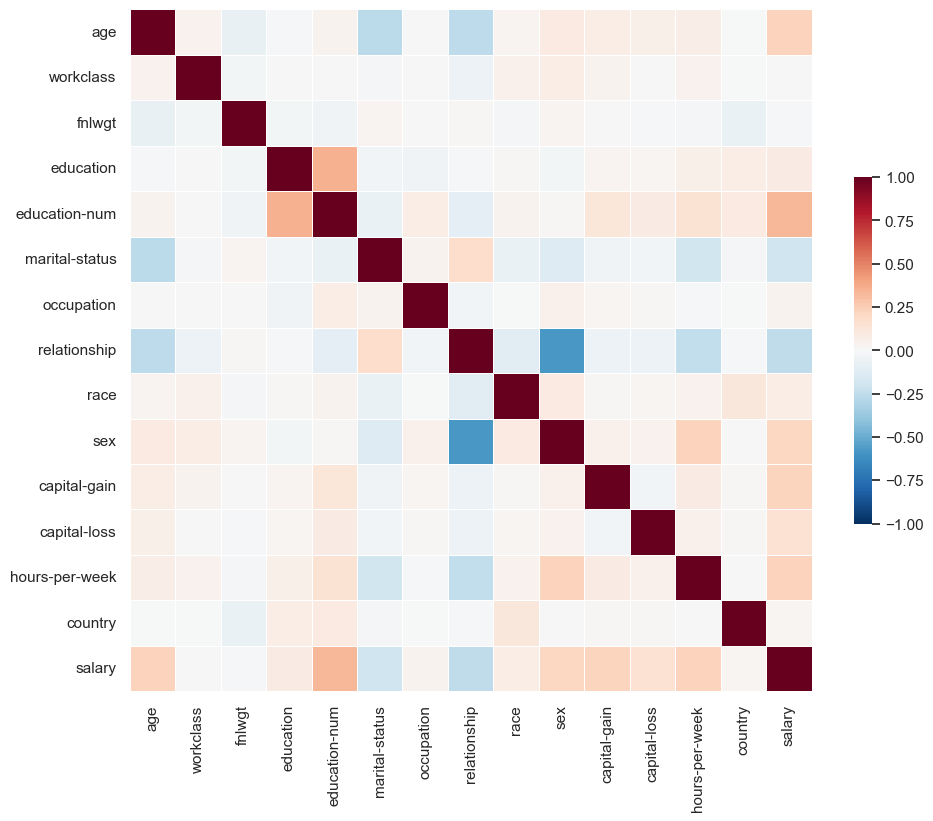

In [133]:
import seaborn as sns
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdBu_r', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [135]:
X = df.drop(["workclass","fnlwgt","salary"],axis=1)
X

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,9,13,4,0,1,4,1,2174,0,40,38
1,50,9,13,2,3,0,4,1,0,0,13,38
2,38,11,9,0,5,1,4,1,0,0,40,38
3,53,1,7,2,5,0,2,1,0,0,40,38
4,28,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,7,12,2,12,5,4,0,0,0,38,38
32557,40,11,9,2,6,0,4,1,0,0,40,38
32558,58,11,9,6,0,4,4,0,0,0,40,38
32559,22,11,9,4,0,3,4,1,0,0,20,38


In [136]:
y = df.salary

In [137]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32

In [138]:
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

In [139]:
# balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [140]:
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [141]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: salary, dtype: float64

# ====== Models ======

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=30)

In [146]:
X_train.dtypes

age               int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
country           int32
dtype: object

In [147]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34608, 12)
X_test shape: (14832, 12)
y_train shape: (34608,)
y_test shape: (14832,)


In [148]:
lr = LogisticRegression(solver = "liblinear")
gn = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()


In [149]:
#LogisticRegression
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

#GaussianNB/ Naive Byers
gn.fit(X_train,y_train)
y_pred_gn = gn.predict(X_test)

#RandomForestClassifier
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

#DecisionTreeClassifier
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#SVC
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#XGB
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

## Evaluation of Models


In [152]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [153]:
print("Logistic Regression:")
print("Accuracy score:", round(accuracy_score(y_test, y_pred_lr) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_lr) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_lr) * 100,3))

Logistic Regression:
Accuracy score: 74.845
F1 Score:  74.853
MSE:  25.155


In [154]:
print("GaussianNB/ Naive Byers:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gn) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_gn) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_gn) * 100,3))

GaussianNB/ Naive Byers:
Accuracy score: 68.602
F1 Score:  57.396
MSE:  31.398


In [155]:
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf) * 100,3))

RandomForestClassifier:
Accuracy score: 90.817
F1 Score:  91.125
MSE:  9.183


In [156]:
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt) * 100,3))

DecisionTreeClassifier:
Accuracy score: 89.388
F1 Score:  89.743
MSE:  10.612


In [157]:
print("Support Vector Machine:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_svc) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_svc) * 100,3))

Support Vector Machine:
Accuracy score: 63.444
F1 Score:  45.243
MSE:  36.556


In [158]:
print("XGBoost Classifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_xgb) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_xgb) * 100,3))

XGBoost Classifier:
Accuracy score: 86.415
F1 Score:  86.803
MSE:  13.585


# Hyper - Tuning Parameters

### Decision Tree

In [159]:
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, param_grid=params,cv=5, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [160]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015329,0.001546,0.002397,0.000796,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
1,0.013644,0.000465,0.002400,0.000489,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
2,0.014419,0.001476,0.002812,0.000742,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
3,0.013406,0.000496,0.002466,0.000453,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
4,0.013187,0.000406,0.002207,0.000398,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49


In [161]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [162]:
grid_search.best_score_

0.8397191175716066

In [163]:
dt_tuned = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=5)
dt_tuned.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [164]:
y_pred_dt_tuned = dt_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt_tuned) * 100,3))


RandomForestClassifier:
Accuracy score: 84.877
F1 Score:  85.211
MSE:  15.123


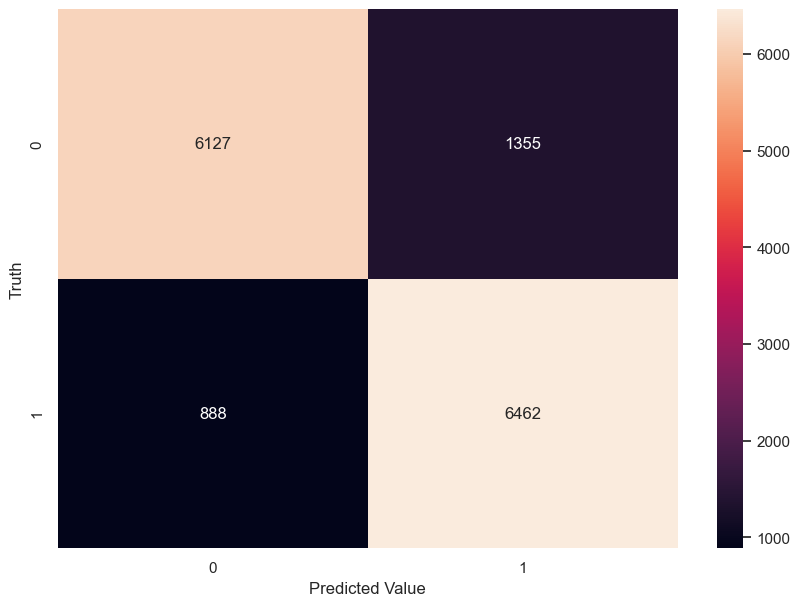

In [165]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

### Random Forest

In [166]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

rf_tuned = RandomForestClassifier(random_state=30)
                       
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=parameters, cv=5, random_state=30)


In [167]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=30)

In [168]:
rf_cv.best_params_

{'n_estimators': 142, 'max_depth': 95}

In [169]:
rf_cv.best_score_

0.8918746094790586

In [170]:
rf_tuned = RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)

In [171]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 90.898
F1 Score:  91.198
MSE:  9.102


In [172]:
score_rf = pd.DataFrame(rf_cv.cv_results_)
score_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.985203,0.022673,0.128682,0.002350,102,40,"{'n_estimators': 102, 'max_depth': 40}",0.897428,0.892372,0.886016,0.888455,0.890478,0.890950,0.003867,6
1,0.792660,0.021300,0.051931,0.001119,40,134,"{'n_estimators': 40, 'max_depth': 134}",0.897862,0.891505,0.887027,0.889033,0.893079,0.891701,0.003711,3
2,1.548597,0.018927,0.100623,0.002775,79,126,"{'n_estimators': 79, 'max_depth': 126}",0.896273,0.892083,0.887749,0.888166,0.891779,0.891210,0.003097,4
3,1.688728,0.017003,0.109962,0.001452,87,134,"{'n_estimators': 87, 'max_depth': 134}",0.896417,0.891650,0.885871,0.888022,0.892212,0.890834,0.003641,7
4,1.413108,0.037016,0.091523,0.003059,71,95,"{'n_estimators': 71, 'max_depth': 95}",0.896851,0.892083,0.885293,0.887011,0.892212,0.890690,0.004120,9


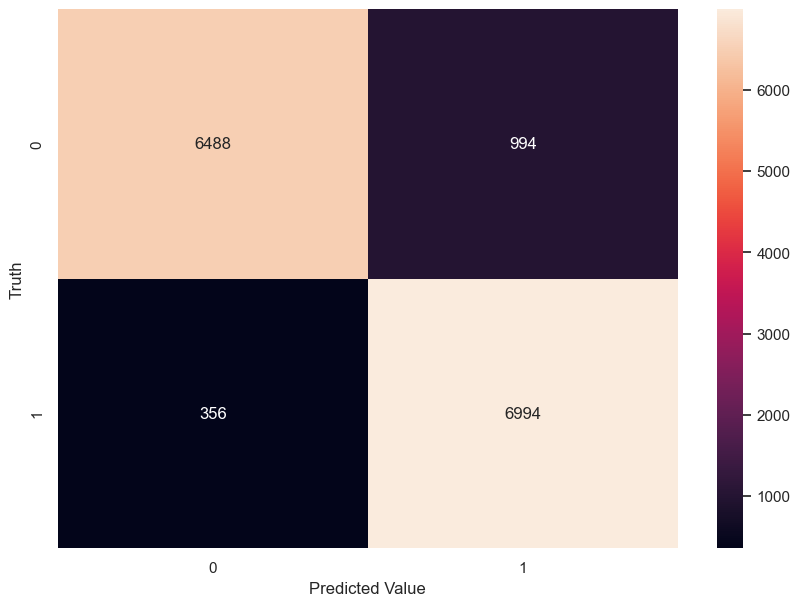

In [173]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

## Here we used multiple models like logistic regression, Naive Byers, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier and XGBoost classifier.


## The highest accuracy score of 90.898 and f1 score of 91.198 is from a Hyper Tuned Random Forest Classifier.
